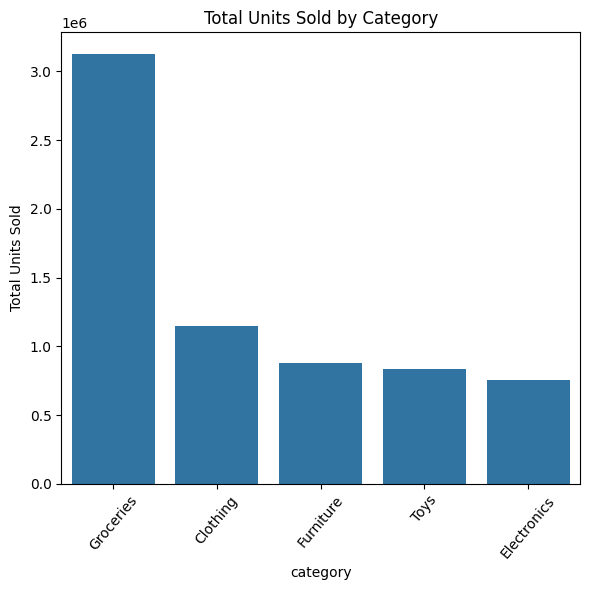

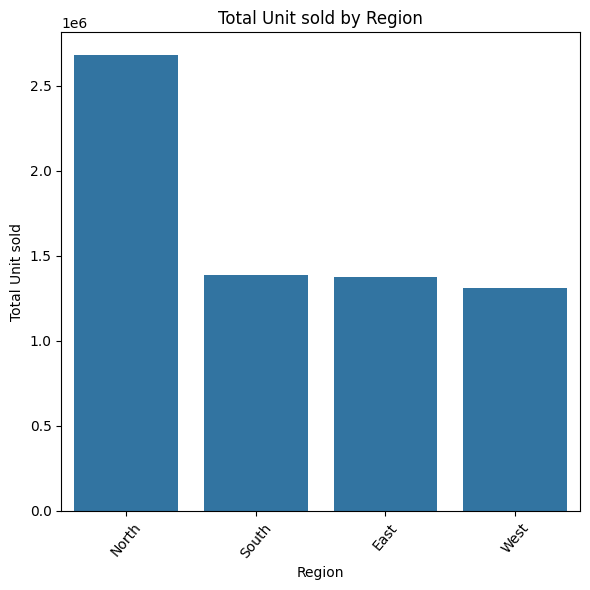

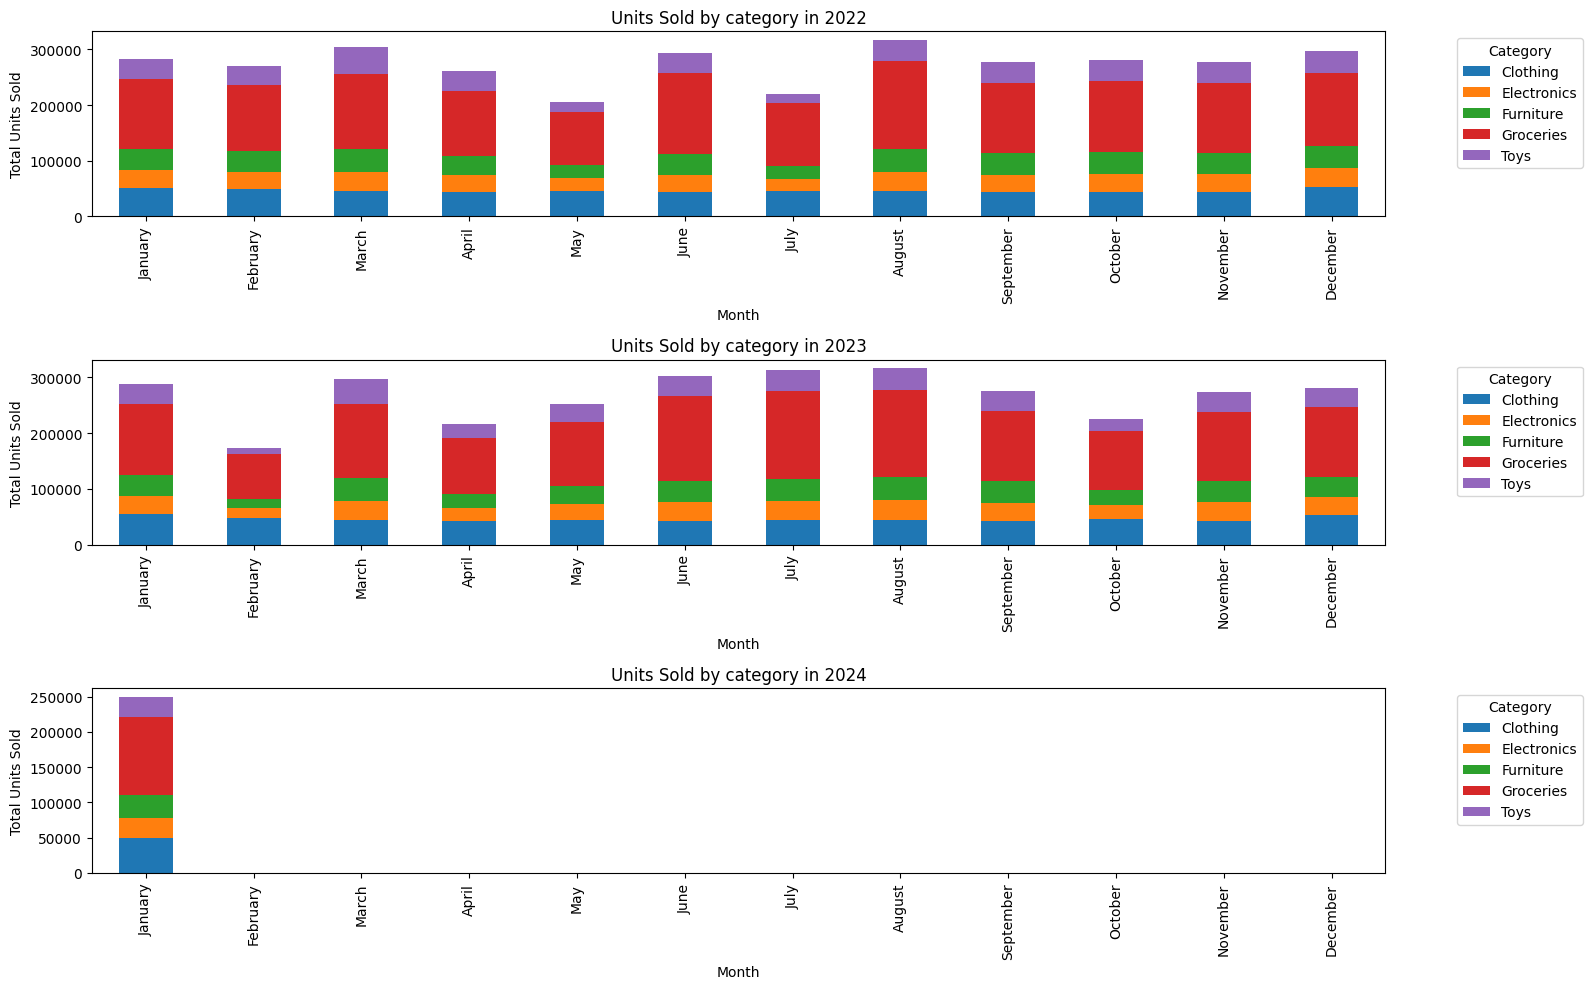

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:/sachin/work/msaai/datasets/sales_data.csv")
# df.head()
# df.describe()
# df.info()

category_sales = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
region_sales=df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)

# Sold units across Categories
plt.figure(figsize=(6,6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Units Sold by Category')
plt.xlabel('category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

# Sold units across Regions
plt.figure(figsize=(6,6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Unit sold by Region')
plt.xlabel('Region')
plt.ylabel('Total Unit sold')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


df['Date']=pd.to_datetime(df['Date'])

# Extract year and month from Date
df['year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()

# Create Year-Month column for chronological sorting
df['Year_Month']=df['Date'].dt.strftime('%y-%m')


# Group by Year, Month, and Category, then sum the Units Sold
sales_summary = df.groupby(['year', 'Month', 'Category'])['Units Sold'].sum().reset_index()

# Group by Year, Month, and Category, then sum the Units Sold
sales_summary['Month_Num']=pd.Categorical(sales_summary['Month'],
                                          categories=["January","February","March","April","May",
                                          "June","July","August","September","October","November",
                                          "December"], ordered=True)
sales_summary=sales_summary.sort_values(['year','Month_Num']).drop('Month_Num',axis=1)


pivot_table=sales_summary.pivot_table(index=['year','Month'],
                                     columns='Category',
                                     values='Units Sold',
                                     fill_value=0)
# Display the pivot table
# print("Sum of Units Sold by Year, Month, and Category:")
# print(pivot_table)


plt.figure(figsize=(16,10))
for year in sales_summary['year'].unique():
    year_data=sales_summary[sales_summary['year']==year]
    pivot=year_data.pivot(index='Month', columns='Category', values='Units Sold')
    # Sort months chronologically
    month_order=["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
    pivot=pivot.reindex(month_order)
    ax=plt.subplot(len(sales_summary['year'].unique()),1,
                   list(sales_summary['year'].unique()).index(year)+1)
    pivot.plot(kind='bar', stacked=True, ax=ax)
    plt.title(f'Units Sold by category in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Units Sold')
    plt.legend(title='Category',bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()



In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

df=pd.read_csv("C:/sachin/work/msaai/datasets/sales_data.csv")
df = df.drop(columns=['Store ID', 'Product ID', 'Units Sold', 'Units Ordered', 'Date'])
df = pd.get_dummies(df, columns=['Region', 'Category', 'Weather Condition', 'Seasonality'], drop_first=True)

for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

df.corr()['Demand'].abs().sort_values(ascending=False)

y = df['Demand']
X = df.drop(columns=['Demand'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For OLS, we need to add a constant term
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

# # 2️⃣ Fit OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)

# # 3️⃣ Fit Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# # 4️⃣ Evaluate performance
print("=== OLS Linear Regression ===")
print(ols_model.summary())
print(f"OLS MSE: {mean_squared_error(y_test, y_pred_ols):.2f}")
print(f"OLS R^2: {r2_score(y_test, y_pred_ols):.2f}\n")

print("=== Random Forest Regression ===")
print(f"RF MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"RF R^2: {r2_score(y_test, y_pred_rf):.2f}")



if r2_score(y_test, y_pred_rf) > r2_score(y_test, y_pred_ols):
    print(f"Random forest with R^2 value as [{r2_score(y_test, y_pred_rf):.2f}] is a better fit than OLS with R^2 value as [{r2_score(y_test, y_pred_ols):.2f}] for sales data")
else:
    print(f"OLS with R^2 value as [{r2_score(y_test, y_pred_ols):.2f}] is a better fit than Random Forest with R^2 value as [{r2_score(y_test, y_pred_rf):.2f}] for sales data")


=== OLS Linear Regression ===
                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2515.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:59:43   Log-Likelihood:            -3.0267e+05
No. Observations:               60800   AIC:                         6.054e+05
Df Residuals:                   60780   BIC:                         6.056e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------